### Geely Auto

Geely Auto want to  enter US market by setting up manufacturing unit .Company want to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing file
car_df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
#to display all columns
from IPython.core.display import HTML
HTML(car_df.head().to_html())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

It is clear that there is no values missing in the data.
Next is we need to fetch car company from CarName.

### Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 
 

In [5]:
car_df['car_model']=car_df.CarName.apply(lambda x : x.split()[0])
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [6]:
#dropping CarName column 
car_df=car_df.drop(['CarName'],axis=1)

In [7]:
#setting car_id as index
car_df.set_index('car_ID',inplace=True)

In [8]:
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_model
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
#getting all the unique values in car_model.
car_df['car_model'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
maxda           2
vokswagen       1
porcshce        1
mercury         1
toyouta         1
Nissan          1
Name: car_model, dtype: int64

In [10]:
# Need to correct few spelling in car_model
def car(x):
    x=x.replace('vw','volkswagen')
    x=x.replace('vokswagen','volkswagen')
    x=x.replace('toyouta','toyota')
    x=x.replace('Nissan','nissan')
    x=x.replace('porcshce','porsche')
    x=x.replace('maxda','mazda')
    return x
car_df['car_model']=car_df['car_model'].apply(car)
car_df['car_model'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_model, dtype: int64

In [11]:
car_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'car_model'],
      dtype='object')

**To check for duplicates rows , removing price column . Then we will check that if there are any duplicate rows**

In [12]:
car=car_df.iloc[:]
car.pop('price')
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'car_model'],
      dtype='object')

In [13]:
# to checks for duplicated
check=car.duplicated(subset=car.columns[:],keep='first')
print(any(check))
HTML(car.loc[(check)].to_html())


True


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_model
car_ID,,,,,,,,,,,,,,,,,,,,,,,,
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.0,111,5000,21,27,alfa-romero
27,1,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.230,9.4,68,5500,31,38,dodge
49,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.170,8.1,176,4750,15,19,jaguar
57,3,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,mazda
62,1,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.390,8.6,84,4800,26,32,mazda
63,0,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.390,8.6,84,4800,26,32,mazda
117,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.520,21.0,95,4150,28,33,peugeot
128,3,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.900,9.5,207,5900,17,25,porsche


**Above are the duplicates rows, so we will remove them**

In [14]:
car_df=car_df.loc[~(check)]
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 1 to 205
Data columns (total 25 columns):
symboling           197 non-null int64
fueltype            197 non-null object
aspiration          197 non-null object
doornumber          197 non-null object
carbody             197 non-null object
drivewheel          197 non-null object
enginelocation      197 non-null object
wheelbase           197 non-null float64
carlength           197 non-null float64
carwidth            197 non-null float64
carheight           197 non-null float64
curbweight          197 non-null int64
enginetype          197 non-null object
cylindernumber      197 non-null object
enginesize          197 non-null int64
fuelsystem          197 non-null object
boreratio           197 non-null float64
stroke              197 non-null float64
compressionratio    197 non-null float64
horsepower          197 non-null int64
peakrpm             197 non-null int64
citympg             197 non-null int64
highwaympg    

In [15]:
HTML(car_df.head().to_html())

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_model
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
6,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0,audi


## Visualizing  data

### Lets check the correlation of variables 

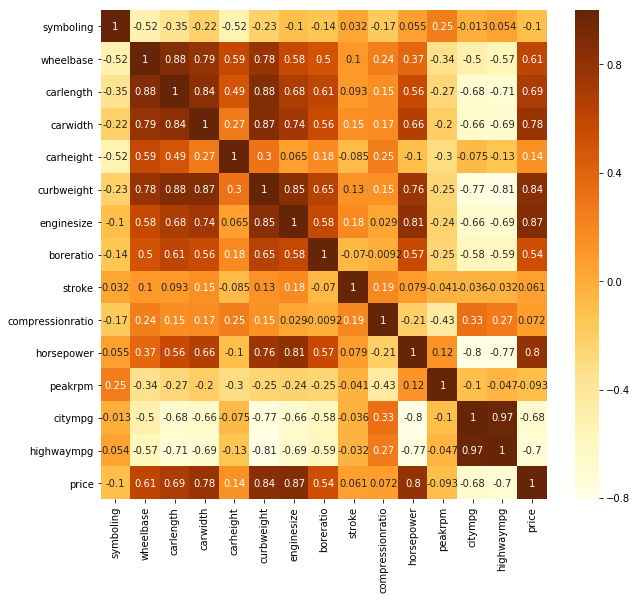

In [16]:
plt.figure(figsize=(10,9))
sns.heatmap(car_df.corr(),cmap='YlOrBr',annot=True)

**There is high correlation between some variables**
carlength , carwidth , enginesize , horsepower ,citympg,highwaympg , curbweight are having very high association with each other.So to reduce multicolinearity 
- area :this is derived from carlength and carwidth
- engine : this is the ratio of enginesize and horsepower
- avg_mpg: this is average mpg of citympg and highwaympg

In [17]:
car_df['area']=car_df['carlength']*car_df['carwidth']
car_df['engine']=car_df['enginesize']/car_df['horsepower']
car_df['avg_mpg']=(car_df['citympg']+car_df['highwaympg'])/2
car_df=car_df.drop(['carlength','carwidth','enginesize','horsepower','citympg','highwaympg'],axis=1)

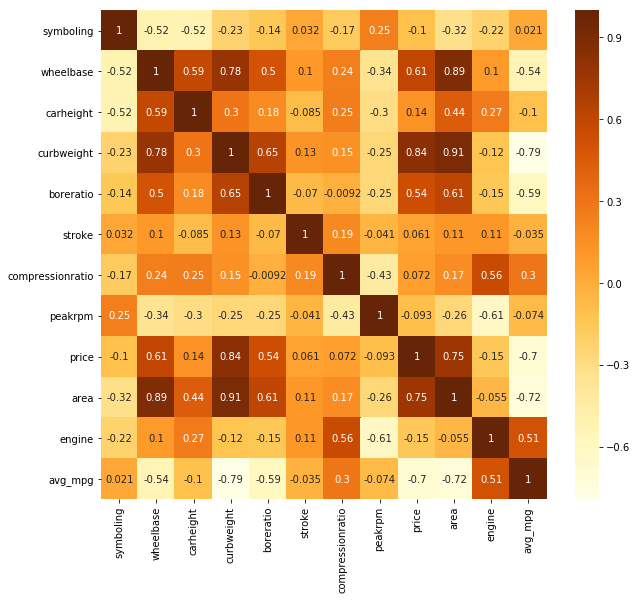

In [18]:
plt.figure(figsize=(10,9))
sns.heatmap(car_df.corr(),cmap='YlOrBr',annot=True)

Still there is high correlation between wheelbase , curbweight to area
To reduce multicolinearity dropping wheelbase and curbweight

In [19]:
car_df=car_df.drop(['wheelbase','curbweight'],axis=1)

## Creating dummy variables

In [20]:
#mapping gas to 1 and diesel to 0
car_df['fueltype']=car_df['fueltype'].map({'gas':1,'diesel':0})
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,car_model,area,engine,avg_mpg
car_ID,,,,,,,,,,,,,,,,,,,,
1,3,1,std,two,convertible,rwd,front,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000,13495.0,alfa-romero,10820.08,1.171171,24.0
3,1,1,std,two,hatchback,rwd,front,52.4,ohcv,six,mpfi,2.68,3.47,9.0,5000,16500.0,alfa-romero,11213.60,0.987013,22.5
4,2,1,std,four,sedan,fwd,front,54.3,ohc,four,mpfi,3.19,3.40,10.0,5500,13950.0,audi,11690.92,1.068627,27.0
5,2,1,std,four,sedan,4wd,front,54.3,ohc,five,mpfi,3.19,3.40,8.0,5500,17450.0,audi,11726.24,1.182609,20.0
6,2,1,std,two,sedan,fwd,front,53.1,ohc,five,mpfi,3.19,3.40,8.5,5500,15250.0,audi,11754.99,1.236364,22.0


In [21]:
# mapping std to 1 and turbo to 0
car_df['aspiration']=car_df['aspiration'].map({'std':1,'turbo':0})
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,car_model,area,engine,avg_mpg
car_ID,,,,,,,,,,,,,,,,,,,,
1,3,1,1,two,convertible,rwd,front,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000,13495.0,alfa-romero,10820.08,1.171171,24.0
3,1,1,1,two,hatchback,rwd,front,52.4,ohcv,six,mpfi,2.68,3.47,9.0,5000,16500.0,alfa-romero,11213.60,0.987013,22.5
4,2,1,1,four,sedan,fwd,front,54.3,ohc,four,mpfi,3.19,3.40,10.0,5500,13950.0,audi,11690.92,1.068627,27.0
5,2,1,1,four,sedan,4wd,front,54.3,ohc,five,mpfi,3.19,3.40,8.0,5500,17450.0,audi,11726.24,1.182609,20.0
6,2,1,1,two,sedan,fwd,front,53.1,ohc,five,mpfi,3.19,3.40,8.5,5500,15250.0,audi,11754.99,1.236364,22.0


In [22]:
# mapping enginelocation front to 1 and rear to 0
car_df['enginelocation']=car_df['enginelocation'].map({'front':1,'rear':0})
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,car_model,area,engine,avg_mpg
car_ID,,,,,,,,,,,,,,,,,,,,
1,3,1,1,two,convertible,rwd,1,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000,13495.0,alfa-romero,10820.08,1.171171,24.0
3,1,1,1,two,hatchback,rwd,1,52.4,ohcv,six,mpfi,2.68,3.47,9.0,5000,16500.0,alfa-romero,11213.60,0.987013,22.5
4,2,1,1,four,sedan,fwd,1,54.3,ohc,four,mpfi,3.19,3.40,10.0,5500,13950.0,audi,11690.92,1.068627,27.0
5,2,1,1,four,sedan,4wd,1,54.3,ohc,five,mpfi,3.19,3.40,8.0,5500,17450.0,audi,11726.24,1.182609,20.0
6,2,1,1,two,sedan,fwd,1,53.1,ohc,five,mpfi,3.19,3.40,8.5,5500,15250.0,audi,11754.99,1.236364,22.0


In [23]:
# creating dummpy variables for engine_type and dropping column rotor
eng_type=pd.get_dummies(car_df['enginetype'])
eng_type.pop('rotor')
eng_type.head()
#eng_type

,dohc,dohcv,l,ohc,ohcf,ohcv
car_ID,,,,,,
1,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0


In [24]:
#crating dummy variable for car_body and dropping hardtop column
car_body=pd.get_dummies(car_df['carbody'])
car_body=car_body.drop(['hardtop'],axis=1)
car_body.head()


,convertible,hatchback,sedan,wagon
car_ID,,,,
1,1,0,0,0
3,0,1,0,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0


In [25]:
# dummy variable for fuel_system and dropping first column
fuel_system=pd.get_dummies(car_df['fuelsystem'],drop_first=True)
fuel_system.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
car_ID,,,,,,,
1,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0


In [26]:
# dummy variable for wheel_drive and dropping first column
wheel_drive=pd.get_dummies(car_df['drivewheel'],drop_first=True)
wheel_drive.head()

,fwd,rwd
car_ID,,
1,0,1
3,0,1
4,1,0
5,0,0
6,1,0


In [27]:
#dummy cvariable for cylinder_number and dropping first column
cylinder_number=pd.get_dummies(car_df['cylindernumber'],drop_first=True)

In [28]:
# concatinating all the dummy variable dataframe 
car_df=pd.concat([eng_type,car_df,fuel_system,car_body,wheel_drive,cylinder_number],axis=1)


In [29]:
#dropping the categorial columns
car_df=car_df.drop(['enginetype','fuelsystem','carbody','drivewheel','cylindernumber'],axis=1)

In [30]:
HTML(car_df.head().to_html())

,dohc,dohcv,l,ohc,ohcf,ohcv,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,compressionratio,peakrpm,price,car_model,area,engine,avg_mpg,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,convertible,hatchback,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,3,1,1,two,1,48.8,3.47,2.68,9.0,5000,13495.0,alfa-romero,10820.08,1.171171,24.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,1,1,1,1,two,1,52.4,2.68,3.47,9.0,5000,16500.0,alfa-romero,11213.60,0.987013,22.5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,2,1,1,four,1,54.3,3.19,3.40,10.0,5500,13950.0,audi,11690.92,1.068627,27.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
5,0,0,0,1,0,0,2,1,1,four,1,54.3,3.19,3.40,8.0,5500,17450.0,audi,11726.24,1.182609,20.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,2,1,1,two,1,53.1,3.19,3.40,8.5,5500,15250.0,audi,11754.99,1.236364,22.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [31]:
#getting values for doornumber
print(car_df['doornumber'].value_counts())

four    111
two      86
Name: doornumber, dtype: int64


In [32]:
#mapping it to 0 and 1
car_df['doornumber']=car_df['doornumber'].map({'two':0,'four':1})

**Symboling is categorial variable indicates +3 as risky and -3 as safe
So we will divide variable into safe and risky
Symboling < 0 is safe 
Symboling >=0 is risky
So we will map safe to 1
and risky to 0**

In [33]:
car_df['symboling']=car_df['symboling'].map({3:0,2:0,1:0,0:0,-1:1,-2:1,-3:1})
car_df.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,symboling,fueltype,aspiration,doornumber,...,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
car_ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,0,1,1,1,...,1,0,1,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,0


In [34]:
HTML(car_df.head().to_html())

,dohc,dohcv,l,ohc,ohcf,ohcv,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,compressionratio,peakrpm,price,car_model,area,engine,avg_mpg,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,convertible,hatchback,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,1,0,1,48.8,3.47,2.68,9.0,5000,13495.0,alfa-romero,10820.08,1.171171,24.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,1,52.4,2.68,3.47,9.0,5000,16500.0,alfa-romero,11213.60,0.987013,22.5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,0,1,1,1,1,54.3,3.19,3.40,10.0,5500,13950.0,audi,11690.92,1.068627,27.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,1,1,1,1,54.3,3.19,3.40,8.0,5500,17450.0,audi,11726.24,1.182609,20.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,1,1,0,1,53.1,3.19,3.40,8.5,5500,15250.0,audi,11754.99,1.236364,22.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0


After handling all categorial columns , now lets check correlation of matrix.

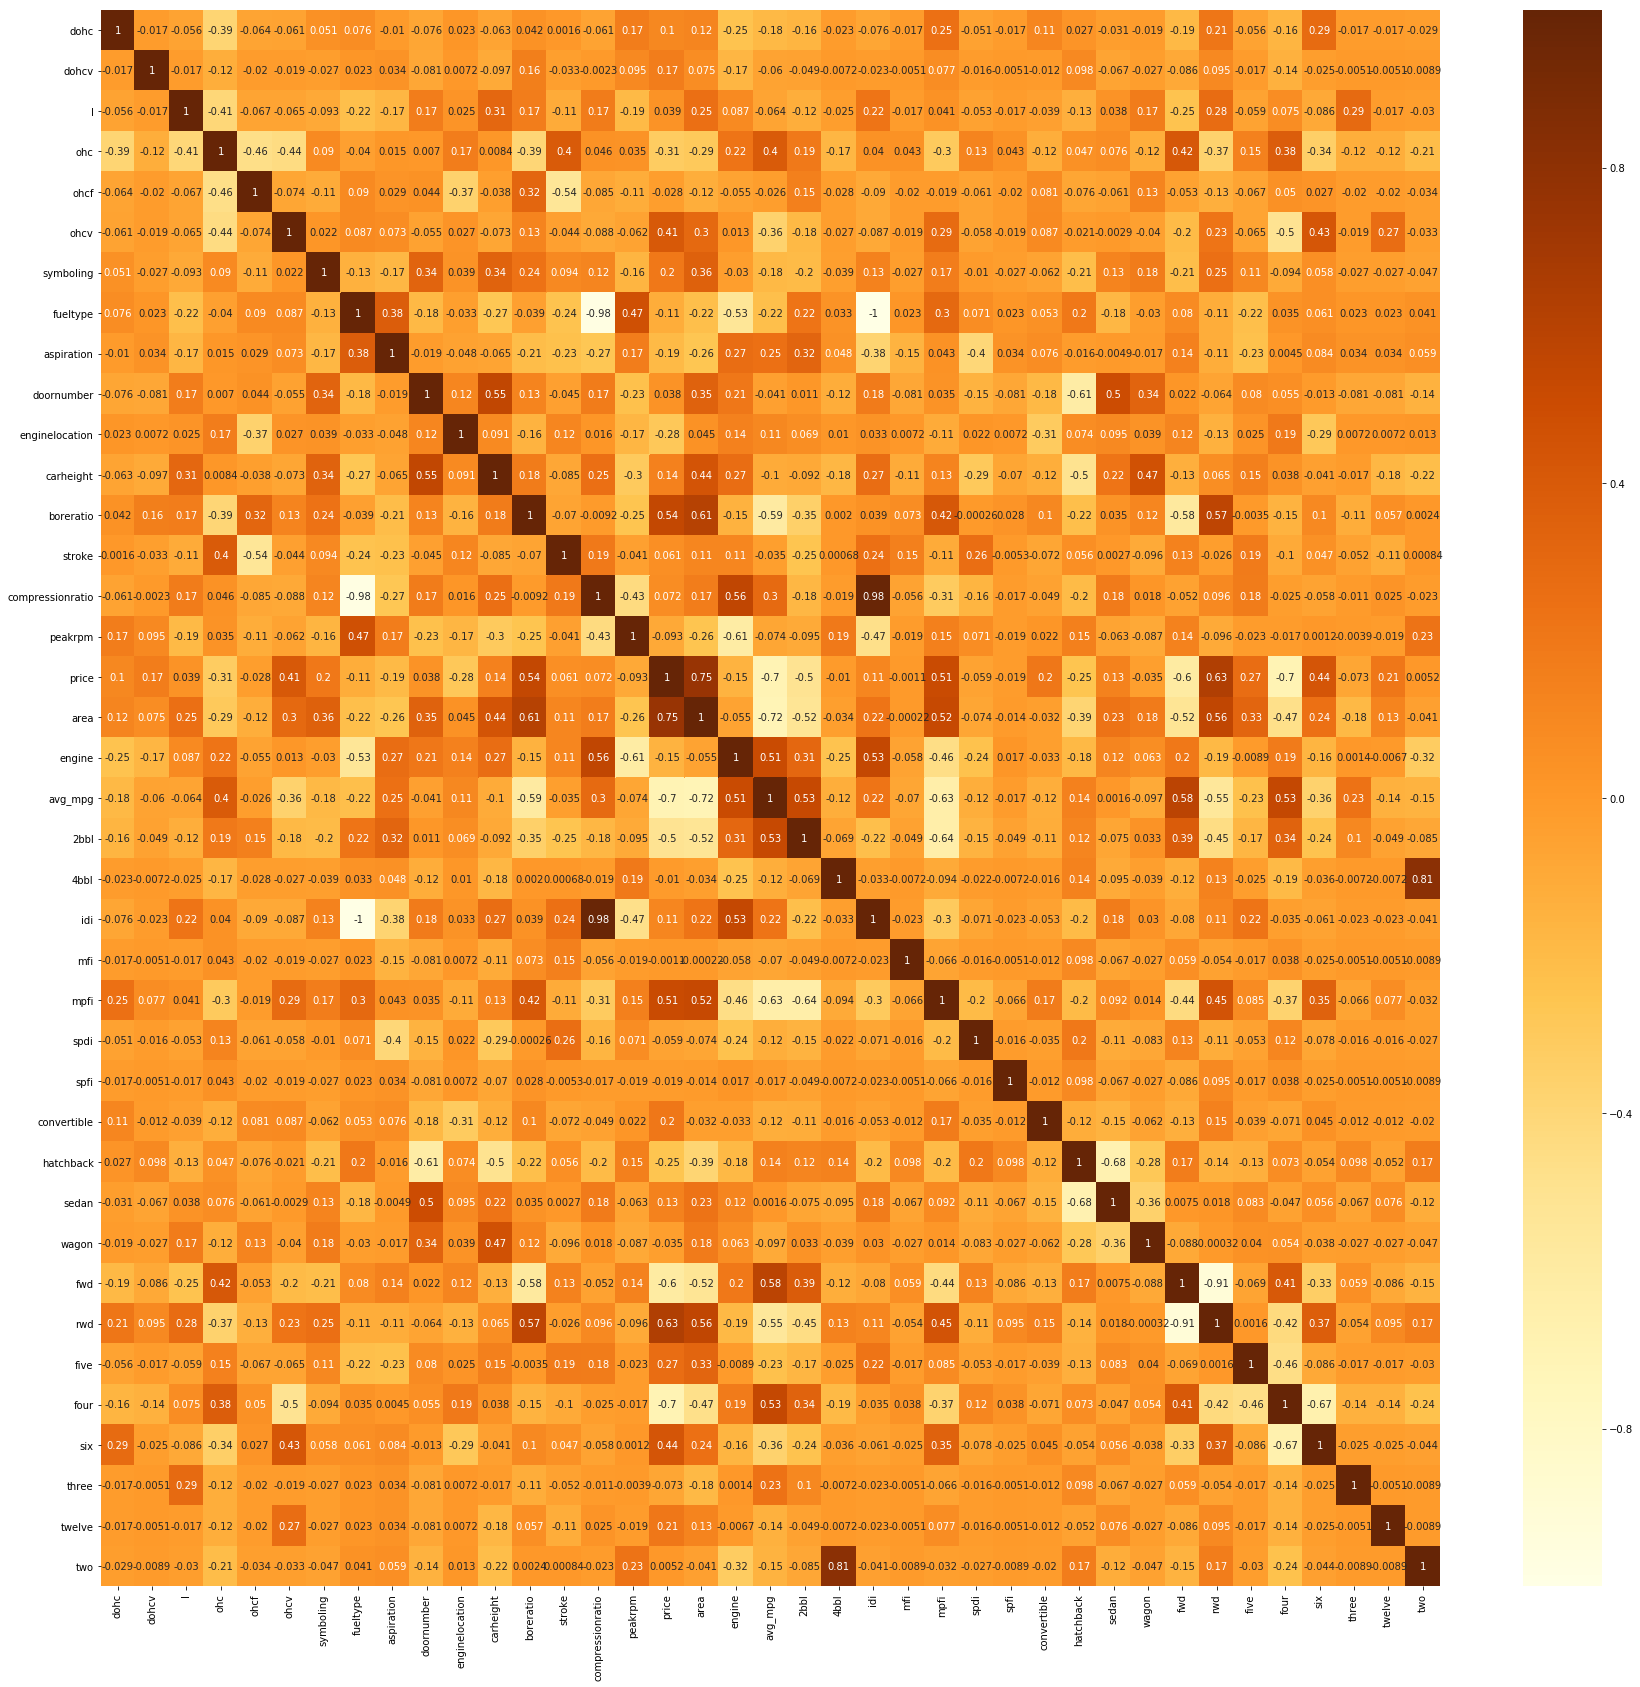

In [35]:
plt.figure(figsize=(30,29))
sns.heatmap(car_df.corr(),cmap='YlOrBr', annot=True)

From the above heatmap , there are still few very high association values , which can cause multicolinearity in regression model.
Like fueltype and compression ratio

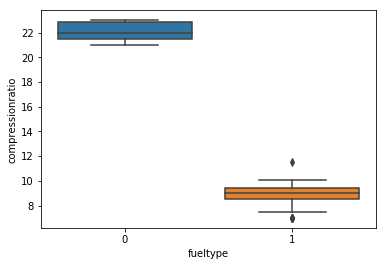

In [36]:
sns.boxplot(x='fueltype',y='compressionratio',data=car_df)

In [37]:
#dropping compression ratio , variable
car_df=car_df.drop(['compressionratio'],axis=1)

In [38]:
#lets create dummy variables for car_model
car_model=pd.get_dummies(car_df['car_model'])
car_df=pd.concat([car_model,car_df],axis=1)

In [39]:
#dropping car_model column
car_df=car_df.drop(['car_model'],axis=1)

In [40]:
HTML(car_df.head().to_html())

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohc,dohcv,l,ohc,ohcf,ohcv,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,peakrpm,price,area,engine,avg_mpg,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,convertible,hatchback,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,48.8,3.47,2.68,5000,13495.0,10820.08,1.171171,24.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,52.4,2.68,3.47,5000,16500.0,11213.60,0.987013,22.5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,54.3,3.19,3.40,5500,13950.0,11690.92,1.068627,27.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,54.3,3.19,3.40,5500,17450.0,11726.24,1.182609,20.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,53.1,3.19,3.40,5500,15250.0,11754.99,1.236364,22.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0


### Splitting data into train and test set

In [41]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(car_df,train_size=0.7,test_size=0.3,random_state=100)

### Rescaling the features

In [42]:
import warnings as wr
wr.filterwarnings('ignore')

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [44]:
HTML(df_train.head().to_html())

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohc,dohcv,l,ohc,ohcf,ohcv,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,peakrpm,price,area,engine,avg_mpg,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,convertible,hatchback,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,54.3,3.19,3.40,5500,17450.0,11726.24,1.182609,20.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,51.4,3.19,3.40,5500,9980.0,10604.80,1.211111,26.5,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,59.8,3.34,3.46,5000,8921.0,11279.16,1.386364,27.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,53.3,3.15,3.29,5200,7799.0,10565.28,1.405797,34.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,56.1,2.54,2.07,5250,15040.0,12408.90,1.100000,24.5,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [45]:
# getting column names which are reqiured to be scaled 
num_vars=['carheight','boreratio','stroke','peakrpm','price','avg_mpg','area','engine']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])


In [46]:
df_train.describe()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000
mean,0.007299,0.043796,0.043796,0.043796,0.021898,0.058394,0.058394,0.021898,0.007299,0.087591,...,0.452555,0.175182,0.591241,0.350365,0.065693,0.781022,0.102190,0.007299,0.0,0.014599
std,0.085436,0.205391,0.205391,0.205391,0.146887,0.235348,0.235348,0.146887,0.085436,0.283737,...,0.499570,0.381518,0.493409,0.478835,0.248655,0.415071,0.304009,0.085436,0.0,0.120379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


**Divide into x and y sets**

In [47]:
y_train=df_train.pop('price')
x_train=df_train

## Buliding our model through RFE

In [48]:
#using Linear Regression function
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,20)
rfe=rfe.fit(x_train,y_train)

In [50]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('alfa-romero', True, 1),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 2),
 ('dodge', False, 3),
 ('honda', True, 1),
 ('isuzu', False, 11),
 ('jaguar', True, 1),
 ('mazda', True, 1),
 ('mercury', False, 39),
 ('mitsubishi', True, 1),
 ('nissan', True, 1),
 ('peugeot', False, 7),
 ('plymouth', True, 1),
 ('porsche', True, 1),
 ('renault', True, 1),
 ('saab', False, 6),
 ('subaru', True, 1),
 ('toyota', True, 1),
 ('volkswagen', False, 4),
 ('volvo', False, 13),
 ('dohc', False, 10),
 ('dohcv', False, 9),
 ('l', True, 1),
 ('ohc', False, 12),
 ('ohcf', True, 1),
 ('ohcv', False, 5),
 ('symboling', False, 36),
 ('fueltype', False, 29),
 ('aspiration', False, 21),
 ('doornumber', False, 33),
 ('enginelocation', True, 1),
 ('carheight', False, 31),
 ('boreratio', False, 16),
 ('stroke', False, 20),
 ('peakrpm', False, 18),
 ('area', True, 1),
 ('engine', False, 23),
 ('avg_mpg', False, 17),
 ('2bbl', False, 26),
 ('4bbl', False, 30),
 ('idi', False, 19

In [51]:
col=x_train.columns[rfe.support_]

In [52]:
x_1=x_train[col]

### Building model using statsmodel, for the detailed statistics

In [53]:
import statsmodels.api as sm
# defining function for building OLS  model
def lr_model(x):
    x_train=sm.add_constant(x)
    lr=sm.OLS(y_train,x_train).fit()
    return lr


## Model 1

In [54]:
#model 1
lr_1=lr_model(x_1)
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     86.52
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.24e-59
Time:                        18:10:32   Log-Likelihood:                 217.38
No. Observations:                 137   AIC:                            -394.8
Df Residuals:                     117   BIC:                            -336.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2001      0.042      4.

### Also check for VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
#function for getting Vif of the model
def VIF(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif
    
    

In [57]:
VIF(x_1)

,features,VIF
16,enginelocation,31.54
15,ohcf,23.54
12,subaru,23.37
18,five,2.76
1,audi,2.33
10,porsche,2.19
19,four,2.19
3,buick,1.89
17,area,1.81
13,toyota,1.38


In lm_1 model honda has high p-value , which is insignificant. So in next model **honda** will be dropped. Also we have few variables which has high VIF values. Which we will deal in further model.

## Model 2

In [58]:
# dropping Honda 
x_2=x_1.drop(['honda'],axis=1)

In [59]:
lr_2=lr_model(x_2)
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     91.05
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.39e-60
Time:                        18:10:32   Log-Likelihood:                 216.64
No. Observations:                 137   AIC:                            -395.3
Df Residuals:                     118   BIC:                            -339.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1944      0.042      4.

In [60]:
VIF(x_2)

,features,VIF
15,enginelocation,29.65
14,ohcf,23.45
11,subaru,23.07
17,five,2.76
1,audi,2.32
18,four,2.19
9,porsche,2.18
3,buick,1.88
16,area,1.76
2,bmw,1.29


In model 2 , there is no change in adjusted r-square , but there is change in p-value of few variables.
Mitsubishi has high p-value. So it will be dropped in next model.

## Model 3

In [61]:
#Dropping column and building model
x_3=x_2.drop(['mitsubishi'],axis=1)
lr_3=lr_model(x_3)
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     95.78
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           5.41e-61
Time:                        18:10:32   Log-Likelihood:                 215.68
No. Observations:                 137   AIC:                            -395.4
Df Residuals:                     119   BIC:                            -342.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1897      0.042      4.

In [62]:
VIF(x_3)

,features,VIF
14,enginelocation,28.77
13,ohcf,23.41
10,subaru,22.91
16,five,2.75
1,audi,2.31
17,four,2.19
8,porsche,2.18
3,buick,1.88
15,area,1.74
2,bmw,1.28


In model 3 , there is no change in adjusted r-square.And now variable which is insignificant is **plymouth**.

## Model 4

In [63]:
#Dropping column and building model
x_4=x_3.drop('plymouth',axis=1)

In [64]:
lr_4=lr_model(x_4)
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.29e-61
Time:                        18:10:32   Log-Likelihood:                 214.65
No. Observations:                 137   AIC:                            -395.3
Df Residuals:                     120   BIC:                            -345.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1865      0.042      4.

In [65]:
VIF(x_4)

,features,VIF
13,enginelocation,28.34
12,ohcf,23.39
9,subaru,22.85
15,five,2.75
1,audi,2.31
16,four,2.19
7,porsche,2.18
3,buick,1.88
14,area,1.73
2,bmw,1.28


In model 4 , adjusted r-square value is same. But now **mazda** has high p-vlaue , which need to be eliminated. Also there is decrease in VIf values.

## Model 5

In [66]:
#Dropping column and building model
x_5=x_4.drop(['mazda'],axis=1)
lr_5=lr_model(x_5)
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           6.46e-62
Time:                        18:10:32   Log-Likelihood:                 212.74
No. Observations:                 137   AIC:                            -393.5
Df Residuals:                     121   BIC:                            -346.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1772      0.042      4.

In [67]:
VIF(x_5)

,features,VIF
12,enginelocation,26.67
11,ohcf,23.28
8,subaru,22.59
14,five,2.74
1,audi,2.29
6,porsche,2.16
15,four,2.16
3,buick,1.86
13,area,1.73
2,bmw,1.25


## Model 6
Dropping renault variable.

In [68]:
x_6=x_5.drop(['renault'],axis=1)
lr_6=lr_model(x_6)
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     110.6
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.99e-62
Time:                        18:10:32   Log-Likelihood:                 210.91
No. Observations:                 137   AIC:                            -391.8
Df Residuals:                     122   BIC:                            -348.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1776      0.042      4.

In [69]:
VIF(x_6)

,features,VIF
11,enginelocation,26.62
10,ohcf,23.28
7,subaru,22.59
13,five,2.74
1,audi,2.29
6,porsche,2.16
14,four,2.16
3,buick,1.86
12,area,1.71
2,bmw,1.24


## Model 7
Dropping **l** variable.

In [70]:
x_7=x_6.drop(['l'],axis=1)
lr_7=lr_model(x_7)
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     116.4
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.54e-62
Time:                        18:10:32   Log-Likelihood:                 208.94
No. Observations:                 137   AIC:                            -389.9
Df Residuals:                     123   BIC:                            -349.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1789      0.043      4.

In [71]:
VIF(x_7)

,features,VIF
10,enginelocation,26.01
9,ohcf,23.28
7,subaru,22.59
12,five,2.74
1,audi,2.27
6,porsche,2.15
13,four,2.15
3,buick,1.79
11,area,1.49
2,bmw,1.22


## Model 8
Dropping Nissan variable.

In [72]:
x_8=x_7.drop('nissan',axis=1)
lr_8=lr_model(x_8)
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           7.92e-63
Time:                        18:10:32   Log-Likelihood:                 206.96
No. Observations:                 137   AIC:                            -387.9
Df Residuals:                     124   BIC:                            -350.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1687      0.043      3.

## Model 9 
Dropping **toyota** variable.

In [73]:
x_9=x_8.drop('toyota',axis=1)
lr_9=lr_model(x_9)
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           3.17e-63
Time:                        18:10:32   Log-Likelihood:                 205.24
No. Observations:                 137   AIC:                            -386.5
Df Residuals:                     125   BIC:                            -351.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1615      0.043      3.

In [74]:
VIF(x_9)

,features,VIF
7,ohcf,23.08
8,enginelocation,22.74
6,subaru,22.21
10,five,2.72
1,audi,2.25
5,porsche,2.13
11,four,2.06
3,buick,1.77
9,area,1.46
2,bmw,1.18


## Model 10
Dropping **alfa-remero** 

In [75]:
x_10=x_9.drop('alfa-romero',axis=1)
lr_10=lr_model(x_10)
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.32e-63
Time:                        18:10:32   Log-Likelihood:                 202.82
No. Observations:                 137   AIC:                            -383.6
Df Residuals:                     126   BIC:                            -351.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1626      0.044      3.

In [76]:
VIF(x_10)

,features,VIF
6,ohcf,23.08
7,enginelocation,22.72
5,subaru,22.20
9,five,2.72
0,audi,2.25
4,porsche,2.13
10,four,2.06
2,buick,1.77
8,area,1.46
1,bmw,1.18


## Model 11 
Enginelocation has high VIF value. So dropping this variable.

In [77]:
x_11=x_10.drop('enginelocation',axis=1)
lr_11=lr_model(x_11)
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.32e-63
Time:                        18:10:33   Log-Likelihood:                 202.82
No. Observations:                 137   AIC:                            -383.6
Df Residuals:                     126   BIC:                            -351.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0295      0.023      1.257      0.2

In [78]:
VIF(x_11)

,features,VIF
6,ohcf,22.12
5,subaru,21.18
7,area,4.99
9,four,3.78
8,five,2.79
0,audi,2.35
4,porsche,2.12
2,buick,1.85
1,bmw,1.18
3,jaguar,1.10


## Model 12 
Both subaru and ohcf has high Vif value, So dropping those variables.

In [79]:
x_12=x_11.drop(['subaru','ohcf'],axis=1)
lr_12=lr_model(x_12)
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           3.76e-63
Time:                        18:10:33   Log-Likelihood:                 196.73
No. Observations:                 137   AIC:                            -375.5
Df Residuals:                     128   BIC:                            -349.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.024      1.442      0.1

In [80]:
VIF(x_12)

,features,VIF
5,area,4.95
7,four,3.61
6,five,2.79
0,audi,2.35
2,buick,1.85
1,bmw,1.18
3,jaguar,1.10
4,porsche,1.08


Now we have all variables significant and also VIF values are under 5. With adjusted r-square value as 0.90


## Residual analysis of train data

In [81]:
x_train_12=sm.add_constant(x_12)
y_train_pred=lr_12.predict(x_train_12)


Text(0.5,0,'error')

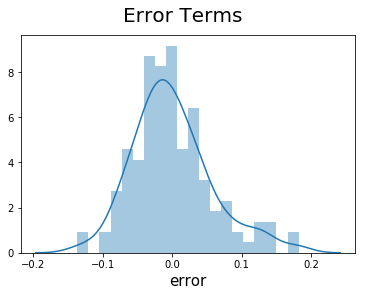

In [82]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle("Error Terms",fontsize=20)
plt.xlabel("error",fontsize=15)

## Making predictions using test model

In [83]:
HTML(df_test.head().to_html())

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohc,dohcv,l,ohc,ohcf,ohcv,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,peakrpm,price,area,engine,avg_mpg,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,convertible,hatchback,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
104,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,55.1,3.43,3.27,5200,13499.0,12275.90,1.190789,22.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
99,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,53.3,3.15,3.29,5200,8249.0,10361.12,1.405797,34.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,53.9,3.31,3.54,4200,9988.0,11677.40,1.326087,29.5,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,54.5,3.15,3.29,5200,7499.0,10546.14,1.405797,34.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,54.8,3.78,3.12,5000,16503.0,12131.20,0.800000,21.5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [84]:
# re-scaling test data.
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [85]:
df_test.describe()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
count,60.000000,60.000000,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.000000,60.000000
mean,0.016667,0.016667,0.033333,0.033333,0.0,0.0,0.083333,0.016667,0.016667,0.033333,...,0.500000,0.016667,0.600000,0.383333,0.033333,0.783333,0.133333,0.0,0.016667,0.016667
std,0.129099,0.129099,0.181020,0.181020,0.0,0.0,0.278718,0.129099,0.129099,0.181020,...,0.504219,0.129099,0.494032,0.490301,0.181020,0.415450,0.342803,0.0,0.129099,0.129099
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


Splitting it into x and y test set

In [86]:
y_test=df_test.pop('price')
x_test=df_test

In [87]:
col=x_12.columns
x_test=x_test[col]


In [88]:
#predicting test data with linear regression model.
x_test_12=sm.add_constant(x_test)
y_test_pred=lr_12.predict(x_test_12)
lr_test=sm.OLS(y_test,x_test_12).fit()
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     45.76
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.27e-20
Time:                        18:10:34   Log-Likelihood:                 75.261
No. Observations:                  60   AIC:                            -132.5
Df Residuals:                      51   BIC:                            -113.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.048      0.086      0.9

### Plotting graph of test data vs predicted data

Text(0,0.5,'y_test_pred')

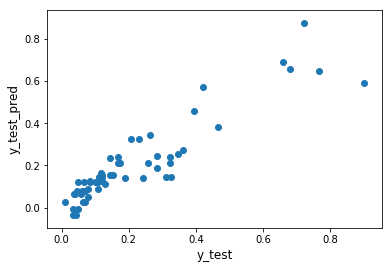

In [89]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("y_test",fontsize=12)
plt.ylabel("y_test_pred",fontsize=12)

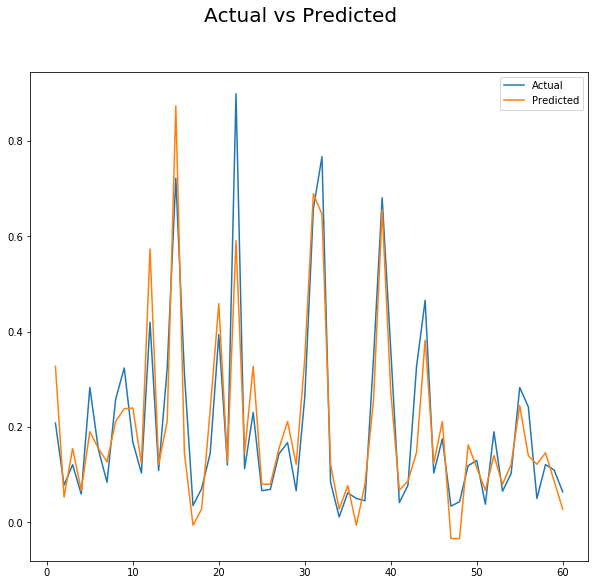

In [90]:
c=[i for i in range(1,61,1)]

plt.figure(figsize=(10,9))
plt.plot(c,y_test,label="Actual")
plt.plot(c,y_test_pred,label='Predicted')
plt.suptitle("Actual vs Predicted",fontsize=20)
plt.legend(loc="upper right")

## PLotting Error distribution 

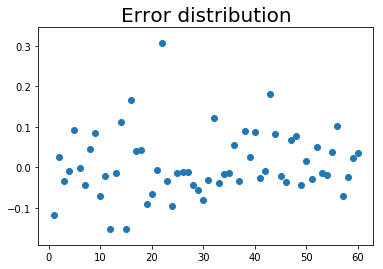

In [91]:
plt.scatter(c,y_test-y_test_pred)
plt.title("Error distribution",fontsize=20)
plt.show()

Final model obtained is verygood model , with high adjusted R-square value 0.90 .But if we see graph of Actual vs Predicted  there is highly overlapping.
From the linear model , variables which are significant in predicing price of car are:
[area,audi,buick,bmw,jaguar,porsche,five,four]
area : it the combination of carlength and carwidth.
now variables are 
- carlength
- carwidth
- audi
- buick
- bmw
- porsche
- five
- four

variable [four & five] are cylinder number. cofficient of these is negative, which means that increasing cylinder number would decrease price of car.
And variable [carlength,carwidth,audi,buick,bmw,porsche] has positve cofficient.

$ price= 0.0349 - 0.1258*four - 0.184*five + 0.1241*audi + 0.371*buick + 0.1951*bmw + 0.22*jaguar + 0.497*porsche + 0.497*area $

**Mean square error and r-squared value**

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

In [93]:
print("Mean square error:",mse)
print("r_squared:",r_squared)

Mean square error: 0.006301549045696867
r_squared: 0.8382693986862402
